# Projet 5 - <font color='green'>Notebook 3</font> - Segmentez des clients d'un site e-commerce

L'objectif de ce projet est de réaliser une segmentation de clients à partir des [données du site de commerce électronique Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

Les données de base sont constituées de 9 fichiers et concernent les commandes effectuées au cours d'une période de 2 ans. Les fichiers ne fournissent pas d'information sur les clients autres que celles nécessaires aux commandes par e-commerce (localisation, commandes effectuées, dates, articles commandés, prix, paiements et éventuels commentaires clients). Pour cette raison, la segmentation est centrée sur l'approche RFM (Récence, Fréquence et Montant des commandes), enrichie le cas échéant par des caractéristiques complémentaires.

Le projet consiste à :

- (a) constituer un jeu de données clients nettoyé,
- (b) l'analyser pour en acquérir la meilleure compréhension,
- (c) identifier les caractéristiques utiles à la segmentation,
- (d) préparer les données pour le machine learning : transformation et réduction de la dimensionnalité afin de permettre la visualisation,
- (e) effectuer des apprentissages non supervisés avec différents algorithmes pour déterminer le clustering le plus pertinent,
- (f) effectuer l'analyse métier du clustering pour en valider l'usage par le marketing de l'entreprise
- (g) estimer la pérennité du modèle de clustering dans le temps afin de donner de la visibilité sur son temps d'utilisation comparé au délai de réalisation des actions marketing.

Le Notebook 3 couvre les étapes (e) et (f) ci-dessus.

## Livrables
Ce projet est mené en langage Python, utilisant les librairies Numpy, Pandas, Matplotlib et Seaborn.
Le machine learning utilise principalement les librairies scikit-learn et scipy.
Les versions sont vérifiées en début de script de ce Notebook.
L'IDE utilisé est Pycharm.

Le rapport est constitué des fichiers suivants :
- Notebook 1 - Analyse exploratoire <font color='green'>P5_notebook1_analyse_exploratoire.ipynb</font>
- Notebook 2 - Feature engineering <font color='green'>P5_notebook2_feature_engineering.ipynb</font>
- Notebook 3 - Modèle de clustering <font color='green'>P5_notebook3_modele_clustering.ipynb</font>
- Notebook 4 - Maintenance des clusters <font color='green'>P5_notebook4_maintenance_clusters.ipynb</font>
- Fichier des fonctions Python utilisées par les notebooks <font color='green'>P5_fonctions.py</font>
- Les fichiers de données se trouvent dans le répertoire <font color='green'>.\P5_data</font>

<a id="sommaire"></a>
## Sommaire
1. [Initialisations](#init)
&nbsp;
2. [Test de l'algorithme k-Means avec les features RFM](#kmeans_rfm)
    1. [Chargement et examen du jeu de données](#load_dataset)
    2. [Algorithme k-Means sur RFM](#kmeans_test)
3. [Mesures et analyses orientées métier sur la base du clustering RFM avec k-Means](#analyse)
&nbsp;
4. [Test de l'algorithme k-Means avec des features supplémentaires](#kmeans_other)
    1. [RFM avec le 'review_score'](#kmeans_rs)
    2. [RFM avec 'review_score' et 'payment_installments'](#kmeans_pay)
5. [Test d'algorithme par densité: DBSCAN](#dbscan)
    1. [Découpage en 2 clusters](#dbscan2)
    2. [Découpage en 3 clusters](#dbscan3)
    3. [Effet de diminution d'epsilon](#dbscan_eps)
    4. [Effet d'augmentation de n_samples](#dbscan_ns)
6. [Test d'algorithmes hiérarchiques agglomératifs](#alg_ha)
    1. [AgglomerativeClustering de Scikit-learn](#alg_ha_skAC)
    2. [Clustering hiérarchique de Scipy](#alg_ha_scipy)
7. [Test du modèle de mélange gaussien - GMM](#gmm)
&nbsp;
7. [Conclusion](#conclusion)

<a id="init"></a>
## 1 - Initialisations

In [1]:
# Import des librairies et fonctions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

import nltk
import copy
import sys

# Fonctions support du projet
import P5_fonctions as fct

# Mesure du temps de calcul:
import timeit
#start_time = timeit.default_timer()
# ... code dont on veut mesurer la durée ...
#elapsed = timeit.default_timer() - start_time
#print(f"Temps de calcul {fct.elapsed_format(elapsed)}")

# Pour afficher les graphiques dans le Notebook
%matplotlib inline
# Pour afficher les graphiques dans une fenêtre matplotlib
#%matplotlib qt

# Gestion des conflits d'installation de ipython et jupyter avec windows:
# - installer pipwin (pip install pipwin), puis
# - installer ipython et jupyter avec pipwin

# Display options
from IPython.display import display, display_html, display_png, display_svg, Image
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 199)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Colorama
from colorama import Fore, Back, Style
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL

# Affiche les versions de Python et packages
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + 'Versions de Python et des principales librairies utilisées :\n' +
      Style.RESET_ALL)
print('- Python : ' + sys.version)
print('- Numpy : ' + np.__version__)
print('- Pandas : ' + pd.__version__)
print('- Matplotlib : ' + mpl.__version__)
print('- Seaborn : ' + sns.__version__)

!jupyter --version

# Suppression des warnings de dépréciation lié à l'utilisation de fig.colorbar
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

Versions de Python et des principales librairies utilisées :

- Python : 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
- Numpy : 1.22.3
- Pandas : 1.4.2
- Matplotlib : 3.5.1
- Seaborn : 0.11.2
Selected Jupyter core packages...
IPython          : 8.3.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.11
qtconsole        : 5.3.0
traitlets        : 5.1.1


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="kmeans_rfm"></a>
## 2 - Test de l'algorithme k-Means avec les features RFM

<a id="load_dataset"></a>
### 2.1 - Chargement et examen du jeu de données

In [2]:
# Répertoire et fichiers de données
data_dir = '.\P5_data'
file = 'data_ml.csv'

# Chargement du jeu de données
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Chargement du jeu de données\n" + Style.RESET_ALL)
data = pd.read_csv(data_dir + "\\" + file , sep=';', encoding='utf-8-sig', index_col='customer_unique_id', low_memory=False)
print(Fore.GREEN + "► Informations :" + Style.RESET_ALL)
display(data.info())
print(Fore.GREEN + "► Entête et fin de jeu de données :" + Style.RESET_ALL)
display(pd.concat([data.head(2), data.tail(2)], axis=0))

Chargement du jeu de données

► Informations :
<class 'pandas.core.frame.DataFrame'>
Index: 93396 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       93396 non-null  float64
 1   frequency     93396 non-null  float64
 2   monetary      93396 non-null  float64
 3   review_score  93396 non-null  float64
 4   state_MG      93396 non-null  float64
 5   state_OS      93396 non-null  float64
 6   state_RJ      93396 non-null  float64
 7   state_SP      93396 non-null  float64
 8   pay_inst_0    93396 non-null  float64
 9   pay_inst_1    93396 non-null  float64
dtypes: float64(10)
memory usage: 7.8+ MB


None

► Entête et fin de jeu de données :


,recency,frequency,monetary,review_score,state_MG,state_OS,state_RJ,state_SP,pay_inst_0,pay_inst_1
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.826,-0.176,-0.110,0.676,-0.342,-0.579,-0.358,0.896,-0.695,0.672
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.806,-0.176,-0.885,-0.079,-0.342,-0.579,-0.358,0.896,0.744,-0.719
ffff5962728ec6157033ef9805bacc48,-0.775,-0.176,-0.166,0.676,-0.342,1.149,-0.358,-0.648,-0.695,0.672
ffffd2657e2aad2907e67c3e9daecbeb,1.607,-0.176,-0.585,0.676,-0.342,1.149,-0.358,-0.648,-0.695,0.672


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="kmeans_test"></a>
### 2.2 - Algorithme k-Means sur RFM
L'examen des 4 métriques pour déterminer le nombre optimum de cluster nous donne :
- Selon l'inertie, et en applicant la méthode du coude, le nombre de clusters peut être choisi entre 4 et 7.
- Selon le coefficient de silhouette, le nombre de clusters est, par ordre de préférence : 4, 7 puis 6, avec une préférence plus marquée pour 4.
- Selon l'indice de Calinski-Harabasz, le nombre de clusters est, par ordre de préférence : 6, 7, 5 puis 4, ces nombres étant à peu près au même niveau.
- Selon l'indice de Davies-Bouldin, le nombre de clusters est, par ordre de préférence : 4, 6, puis 7, avec une préférence plus marquée pour 4.

Au total, le nombre de clusters est préférentiellement 4, avec également les possibilités pour 6 et 7.

K-Means sur RFM - Nombre optimum de clusters



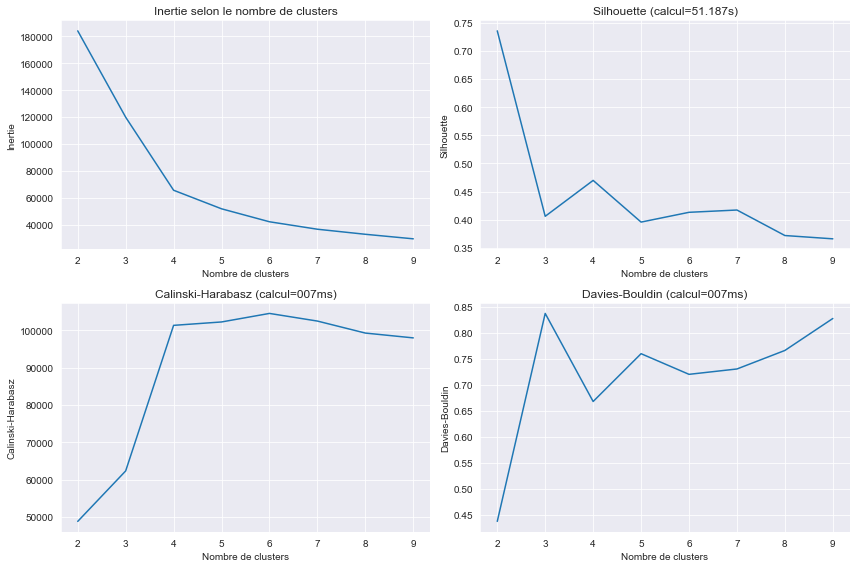

In [3]:
from sklearn.cluster import KMeans
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "K-Means sur RFM - Nombre optimum de clusters\n" + Style.RESET_ALL)

# Features RFM
features = ['recency', 'frequency', 'monetary']
X = data[features].values

# k-Means pour différents nombres de clusters
fct.kmeans_metric_plot(X, ks=np.arange(2, 10), eval=['silhouette', 'calinski_harabasz', 'davies_bouldin'])
#fct.kmeans_metric_plot(X, ks=np.arange(2, 10), eval=['calinski_harabasz', 'davies_bouldin'])

K-Means sur RFM - affichages des clusters dans le plan de plus forte inertie

► n_clusters=4 :


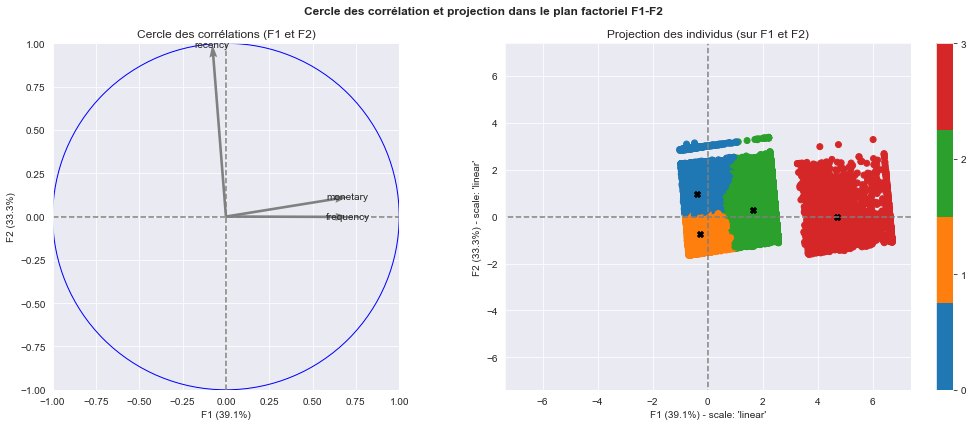

► n_clusters=6 :


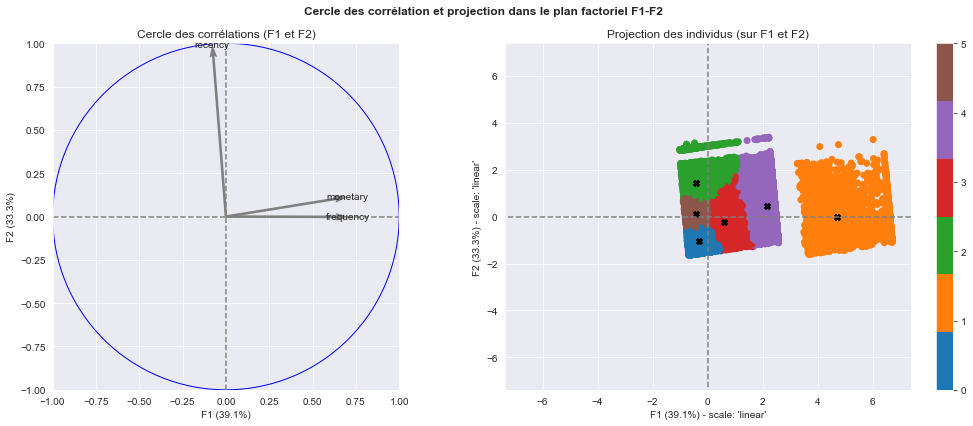

► n_clusters=7 :


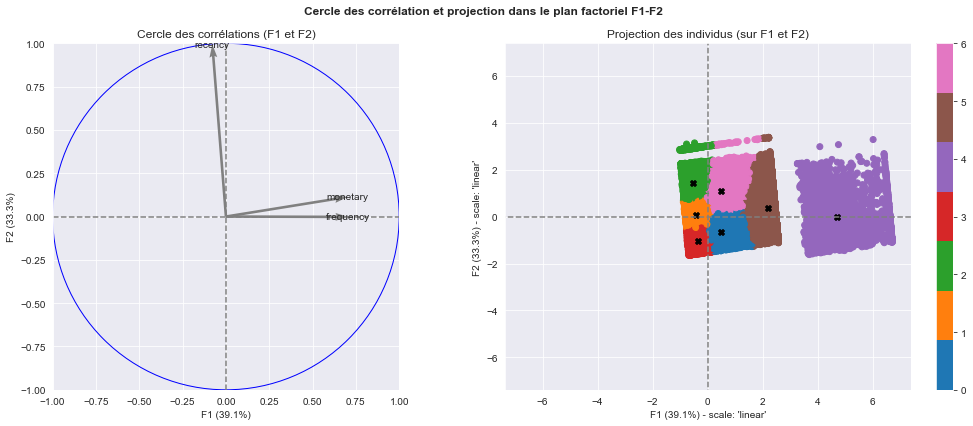

In [4]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM - affichages des clusters dans le plan de plus forte inertie\n"
      + Style.RESET_ALL)

# Affichage dans le plan de plus forte inertie
from sklearn.decomposition import PCA
n_comp = 2
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
for k in [4, 6, 7]:
    print(Fore.GREEN + f"► n_clusters={k} :" + Style.RESET_ALL)
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    color = model.predict(X)
    color = (color - color.min()) / (color.max() - color.min())
    cmap = fct.discrete_colormap(fct.discrete_palette[:k])[0]
    cnames = np.array(range(k))
    centroids = pca.transform(model.cluster_centers_)
    fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

In [5]:
from sklearn.manifold import TSNE
n_components = 2
X_embedded = TSNE(n_components=n_components, perplexity=300.0,
                  learning_rate='auto', init='random').fit_transform(X)

K-Means sur RFM - affichages des clusters avec t-SNE

► n_clusters=4 :


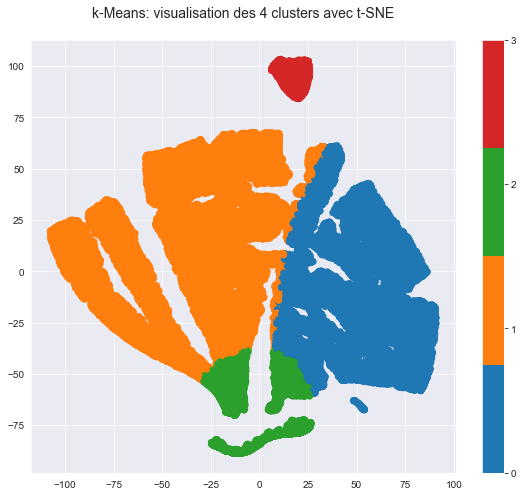

► n_clusters=6 :


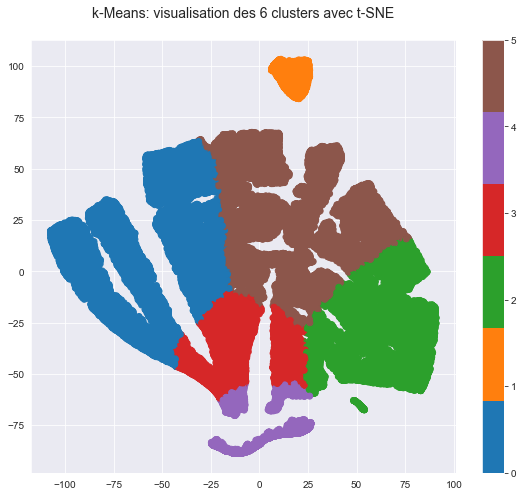

► n_clusters=7 :


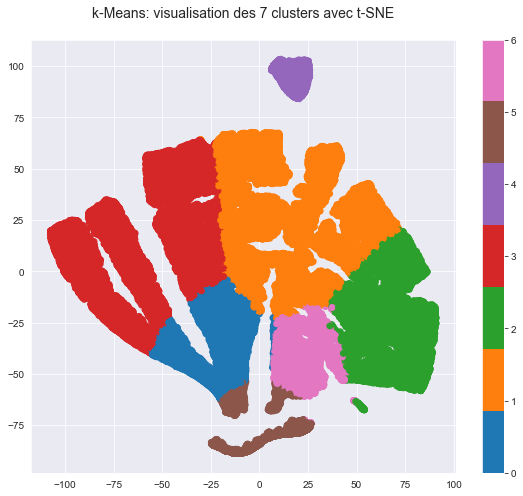

In [6]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM - affichages des clusters avec t-SNE\n"
      + Style.RESET_ALL)
for k in [4, 6, 7]:
    print(Fore.GREEN + f"► n_clusters={k} :" + Style.RESET_ALL)

    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)

    color = model.predict(X)
    color = (color - color.min()) / (color.max() - color.min())
    cmap = fct.discrete_colormap(fct.discrete_palette[:k])[0]
    cnames = np.array(range(k))

    fig= plt.figure(figsize=(8, 7))
    plt.title(f"k-Means: visualisation des {k} clusters avec t-SNE\n ", fontsize=14)
    sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=color, cmap=cmap)
    cbar = fig.colorbar(sc, ax=plt.gca())
    cbar.set_ticks(np.unique(color))
    cbar.set_ticklabels(cnames)
    plt.tight_layout()
    plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="analyse"></a>
## 3 - Mesures et analyses orientées métier sur la base du clustering RFM avec K-Means
Cette section est consacrée à l'analyse du clustering effectué sous l'angle métier afin de déterminer s'il peut permettre une segmentation effective de la population des clients du site de e-commerce.
Dans ce but, nous menons la démarche suivante pour chacune des 3 valeurs de nombre de clusters utilisées pour k-Means (4, 6 et 7):
1) Calcul des données caractéristiques de chaque cluster :
    - taille de la population afin de vérifier qu'elle est suffisamment importante pour pouvoir constituer un segment ;
    - position du centroïde pour chaque feature ;
    - valeurs minimum et maximum de chaque feature.

2) ANOVA des features en fonction des clusters afin de visualiser leurs positionnements.
&nbsp;
3) Synthèse dans un tableau pour conclure sur la validité et l'intérêt commercial de chaque cluster.

Tous les clusters contiennent une population suffisamment importante (> 3%) et peuvent être clairement définis (les qualificatifs de faible, intermédiaire et élevé peuvent être quantifiés avec les données caractéristiques): ils sont donc tous valides.
Par ailleurs, les couleurs de vert à rouge en passant par le jaune donnent une indication de l'intérêt commercial de chaque cluster (vert: intérêt le plus fort et rouge le plus faible) afin de supporter une démarche de priorisation de l'action marketing de l'entreprise.
En synthèse, nous recommandons une segmentation en 4 clusters qui pourrait être affinée avec les autres features.

K-Means sur RFM - Profil des individus pour n_clusters=4

► Données caractéristiques par cluster :


,size,min_recency,centroid_recency,max_recency,min_frequency,centroid_frequency,max_frequency,min_monetary,centroid_monetary,max_monetary
cluster,,,,,,,,,,
0,34905,262.607,394.752,728.494,0.5,0.5,0.5,10.07,117.051,455.01
1,47503,4.754,132.381,264.052,0.5,0.5,0.5,10.89,115.209,365.38
2,8181,4.784,238.105,698.822,0.5,0.5,0.5,306.64,532.516,700.00
3,2807,0.000,225.403,696.027,1.0,1.0,1.0,37.34,302.214,700.00


► ANOVA pour la paire :  ['k-Means (k=4)', 'recency']


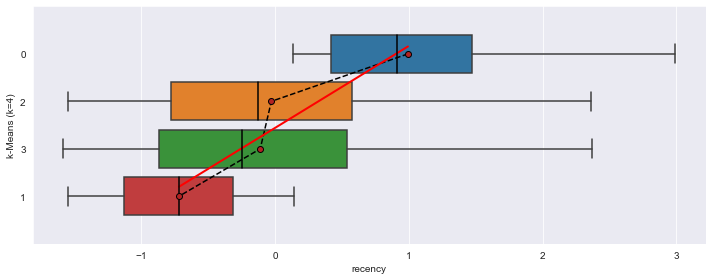

► ANOVA pour la paire :  ['k-Means (k=4)', 'monetary']


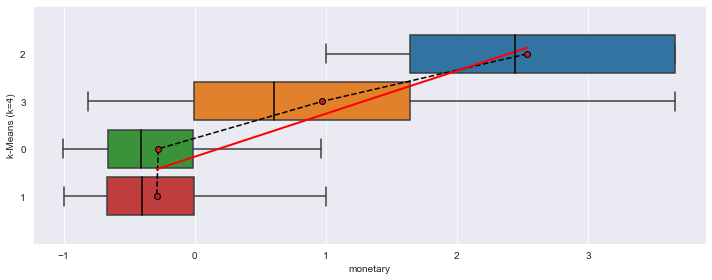

► Proposition de segmentation :


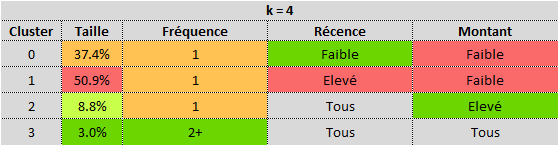



K-Means sur RFM - Profil des individus pour n_clusters=6

► Données caractéristiques par cluster :


,size,min_recency,centroid_recency,max_recency,min_frequency,centroid_frequency,max_frequency,min_monetary,centroid_monetary,max_monetary
cluster,,,,,,,,,,
0,28829,4.754,90.094,180.480,0.5,0.5,0.5,10.89,100.859,261.29
1,2807,0.000,225.403,696.027,1.0,1.0,1.0,37.34,302.214,700.00
2,19140,347.706,467.527,728.494,0.5,0.5,0.5,12.28,121.420,467.20
3,10254,5.014,192.428,476.436,0.5,0.5,0.5,183.60,302.991,504.19
4,4728,4.784,256.251,698.822,0.5,0.5,0.5,426.30,637.296,700.00
5,27638,173.816,264.018,378.730,0.5,0.5,0.5,10.07,93.510,232.71


► ANOVA pour la paire :  ['k-Means (k=6)', 'recency']


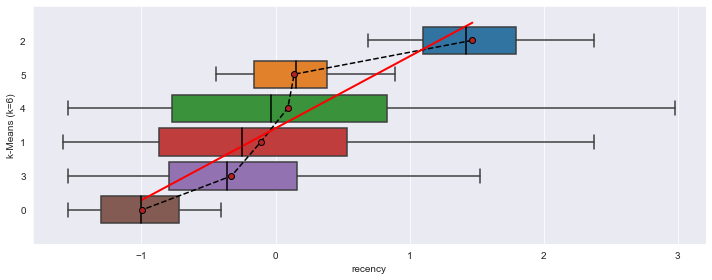

► ANOVA pour la paire :  ['k-Means (k=6)', 'monetary']


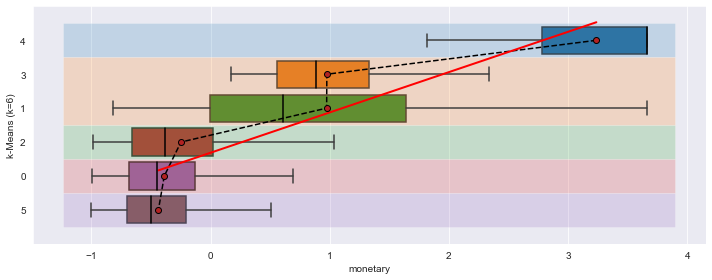

► Proposition de segmentation :


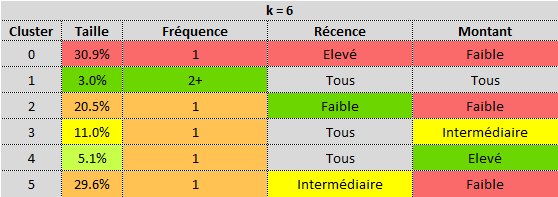



K-Means sur RFM - Profil des individus pour n_clusters=7

► Données caractéristiques par cluster :


,size,min_recency,centroid_recency,max_recency,min_frequency,centroid_frequency,max_frequency,min_monetary,centroid_monetary,max_monetary
cluster,,,,,,,,,,
0,9592,5.014,129.403,265.037,0.5,0.5,0.5,169.87,273.105,502.27
1,27286,173.771,261.012,364.041,0.5,0.5,0.5,10.07,94.636,232.10
2,16657,364.325,467.248,728.494,0.5,0.5,0.5,11.63,94.290,287.91
3,26331,4.754,89.896,176.863,0.5,0.5,0.5,10.89,90.738,201.82
4,2807,0.000,225.403,696.027,1.0,1.0,1.0,37.34,302.214,700.00
5,4523,4.784,238.436,698.693,0.5,0.5,0.5,444.30,643.604,700.00
6,6200,248.502,390.364,698.876,0.5,0.5,0.5,176.63,299.596,625.20


► ANOVA pour la paire :  ['k-Means (k=7)', 'recency']


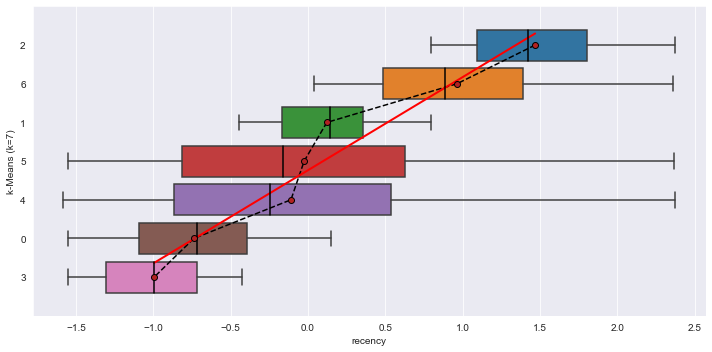

► ANOVA pour la paire :  ['k-Means (k=7)', 'monetary']


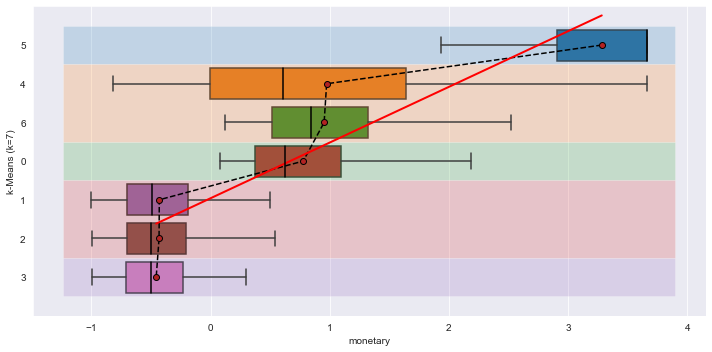

► Proposition de segmentation :


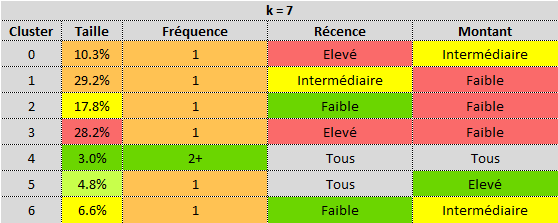

In [7]:
# Mesure des caractéristiques de chaque cluster
features = ['recency', 'frequency', 'monetary']
X = data[features].values

fct.ssc_tr_param = fct.read_param_ssc()

for k in [4, 6, 7]:
    print(Fore.BLACK + Style.BRIGHT + Back.WHITE
          + f"K-Means sur RFM - Profil des individus pour n_clusters={k}\n"
          + Style.RESET_ALL)
    print(Fore.GREEN + f"► Données caractéristiques par cluster :" + Style.RESET_ALL)
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    data[f"k-Means (k={k})"] = model.predict(X)
    df = fct.get_clusters_info(data, features, f"k-Means (k={k})", model.cluster_centers_)
    display(df)

    for feature in ['recency', 'monetary']:
        fct.anova(data, [f"k-Means (k={k})", feature], nb_cat=k, verbose=0)
    data.drop(columns=[f"k-Means (k={k})"], inplace=True)

    print(Fore.GREEN + f"► Proposition de segmentation :" + Style.RESET_ALL)
    filename = f".\P5_fig\K-Means segmentation k{k}.png"
    display_png(Image(filename))
    print('\n')

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="kmeans_other"></a>
## 4 - Test de l'algorithme k-Means avec des features supplémentaires

<a id="kmeans_rs"></a>
### 4.1 - RFM avec le 'review_score'
Les contours des clusters sont un peu moins précis, mais le résultat en 5 clusters semble fonctionner.

K-Means sur RFM+review_score - Nombre optimum de clusters



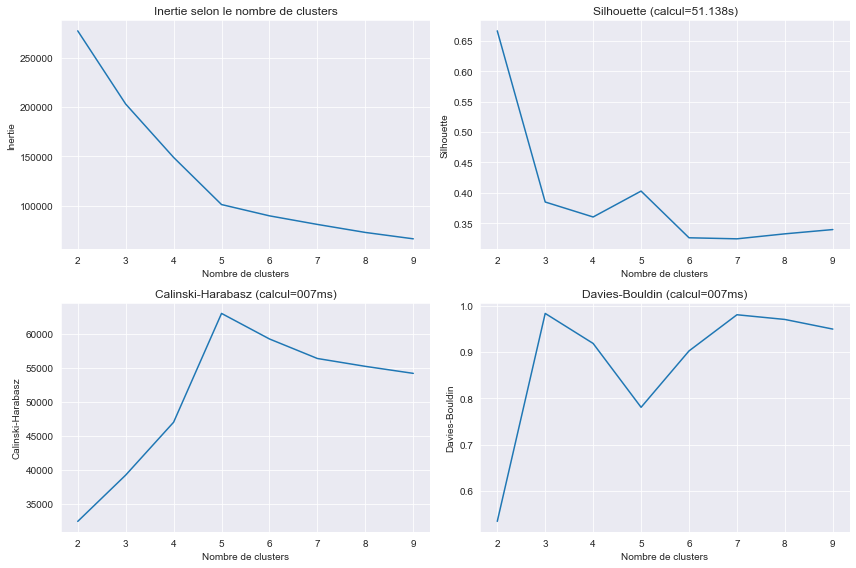

In [8]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "K-Means sur RFM+review_score - Nombre optimum de clusters\n" + Style.RESET_ALL)

# Features RFM
features = ['recency', 'frequency', 'monetary', 'review_score']
X = data[features].values

# k-Means pour différents nombres de clusters
fct.kmeans_metric_plot(X, ks=np.arange(2, 10), eval=['silhouette', 'calinski_harabasz', 'davies_bouldin'])
#fct.kmeans_metric_plot(X, ks=np.arange(2, 10), eval=['calinski_harabasz', 'davies_bouldin'])

K-Means sur RFM+review_score - Affichage des clusters dans le plan de plus forte inertie

► Clusters pour n_clusters=5 :


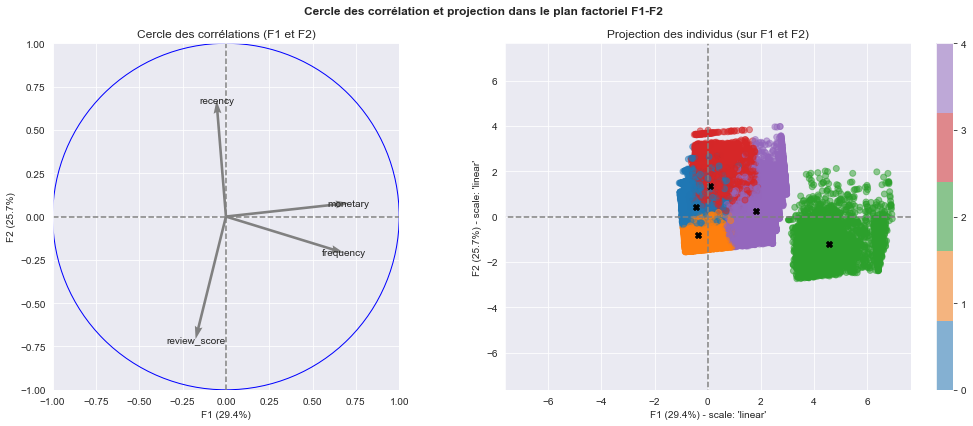

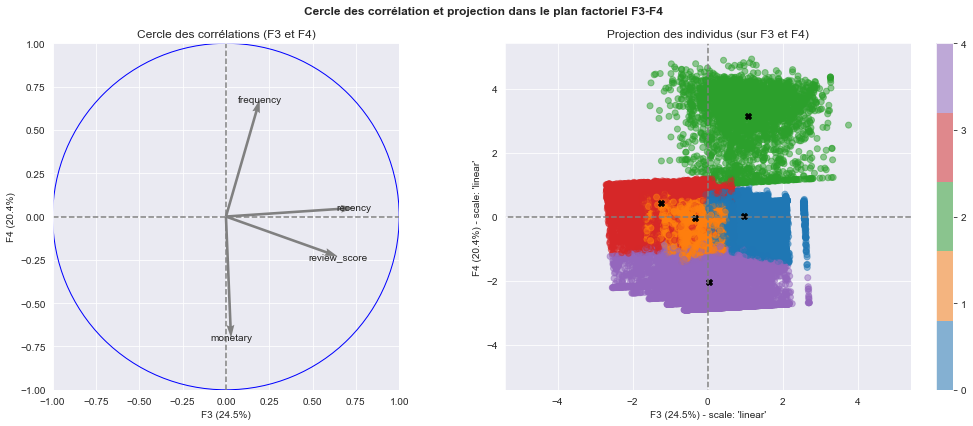

In [9]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM+review_score - Affichage des clusters dans le plan de plus forte inertie\n"
      + Style.RESET_ALL)

# Affichage dans le plan de plus forte inertie
n_comp = 4
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
print(Fore.GREEN + "► Clusters pour n_clusters=5 :" + Style.RESET_ALL)
n_clusters = 5
model = KMeans(n_clusters=5)
model.fit(X)
color = model.predict(X)
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters])[0]
cnames = np.array(range(n_clusters))
centroids = pca.transform(model.cluster_centers_)
fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [3, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="kmeans_pay"></a>
### 4.2 - RFM avec 'review_score' et 'payment_installments'
Compte tenu de l'introduction de cette variable catégorielle, nous examinons le clustering de chacune des 2 parties de la population des clients selon l'état de la variable.
L'affichage graphique montre 10 clusters (5 clusters par état de la variable catégorielle) permettant d'orienter la segmentation (cf §2 pour la transformation des clusters en segments).

In [10]:
# Features
features = ['recency', 'frequency', 'monetary', 'review_score']
no_inst = data['pay_inst_1'].min()
inst = data['pay_inst_1'].max()

# Clients qui ne paient pas en plusieurs fois
X1 = data.loc[data['pay_inst_1']==no_inst, features].values

# Clients qui ne paient pas en plusieurs fois
X2 = data.loc[data['pay_inst_1']!=no_inst, features].values

K-Means sur RFM + review_score + paiement en une fois - Nombre optimum de clusters



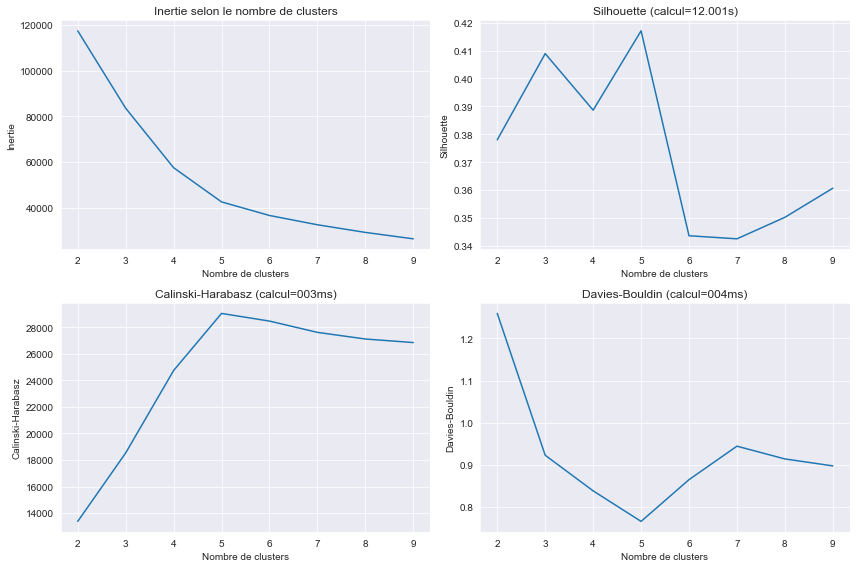

In [11]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM + review_score + paiement en une fois - Nombre optimum de clusters\n"
      + Style.RESET_ALL)

# k-Means pour différents nombres de clusters
fct.kmeans_metric_plot(X1, ks=np.arange(2, 10), eval=['silhouette', 'calinski_harabasz', 'davies_bouldin'])
#fct.kmeans_metric_plot(X1, ks=np.arange(2, 10), eval=['calinski_harabasz', 'davies_bouldin'])

K-Means sur RFM + review_score + paiement en une fois - Affichage des clusters

► Clusters pour n_clusters=5 :


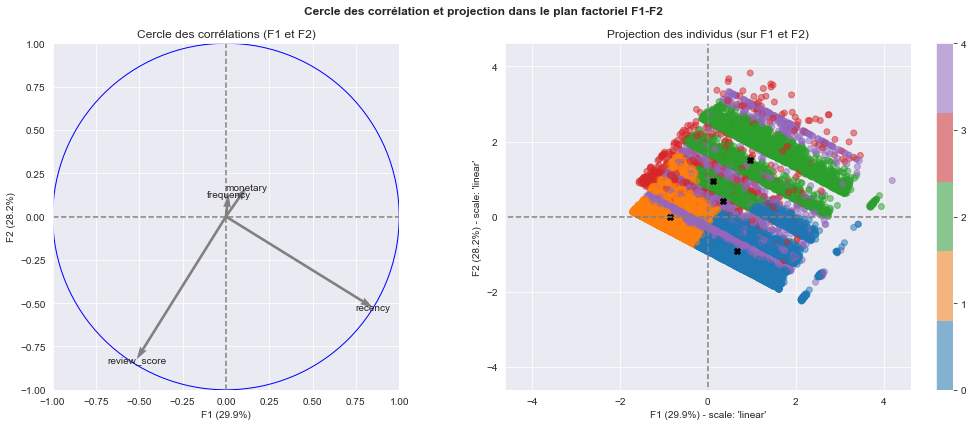

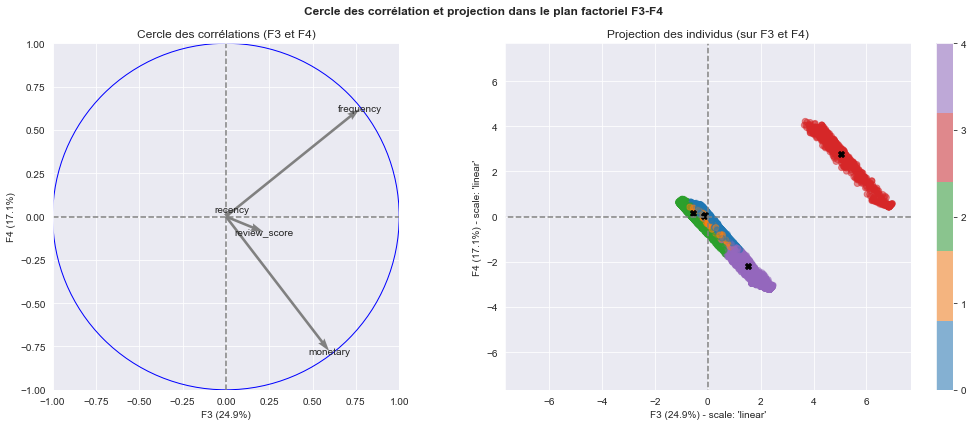

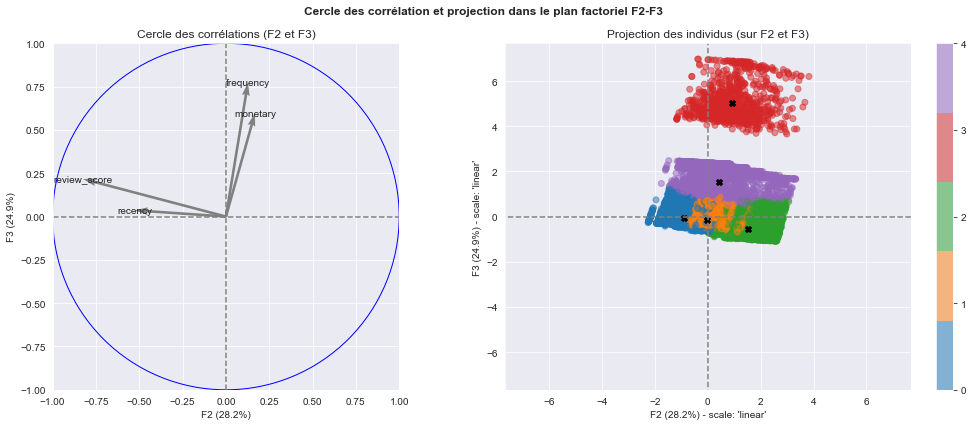

In [12]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM + review_score + paiement en une fois - Affichage des clusters\n"
      + Style.RESET_ALL)

# Affichage dans le plan de plus forte inertie
n_comp = 4
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X1)
pcs = pca.components_
X1_projected = pca.transform(X1)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
print(Fore.GREEN + "► Clusters pour n_clusters=5 :" + Style.RESET_ALL)
n_clusters = 5
model = KMeans(n_clusters=5)
model.fit(X1)
predict1 = model.predict(X1)
color = model.predict(X1)
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters])[0]
cnames = np.array(range(n_clusters))
centroids = pca.transform(model.cluster_centers_)
fct.projetNcircle_plot(pcs, X1_projected, n_comp, pca, [1, 2], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X1_projected, n_comp, pca, [3, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X1_projected, n_comp, pca, [2, 3], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

K-Means sur RFM + review_score + paiement en plusieurs fois - Nombre optimum de clusters



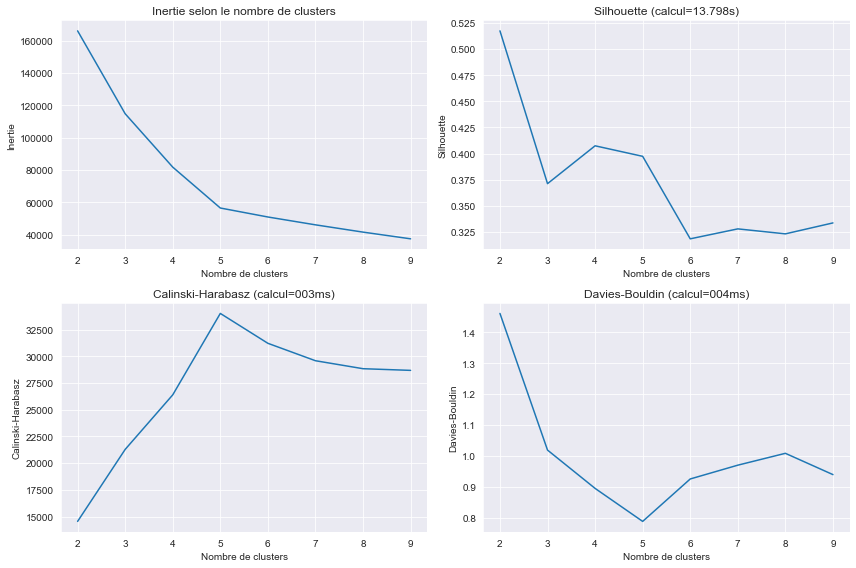

In [13]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM + review_score + paiement en plusieurs fois - Nombre optimum de clusters\n"
      + Style.RESET_ALL)

# k-Means pour différents nombres de clusters
fct.kmeans_metric_plot(X2, ks=np.arange(2, 10), eval=['silhouette', 'calinski_harabasz', 'davies_bouldin'])
#fct.kmeans_metric_plot(X2, ks=np.arange(2, 10), eval=['calinski_harabasz', 'davies_bouldin'])

K-Means sur RFM + review_score + paiement en plusieurs fois - Affichage des clusters

► Clusters pour n_clusters=5 :


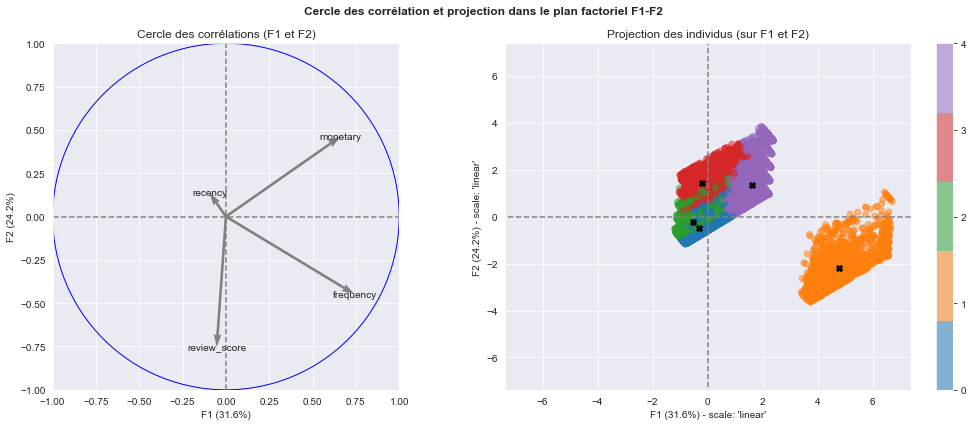

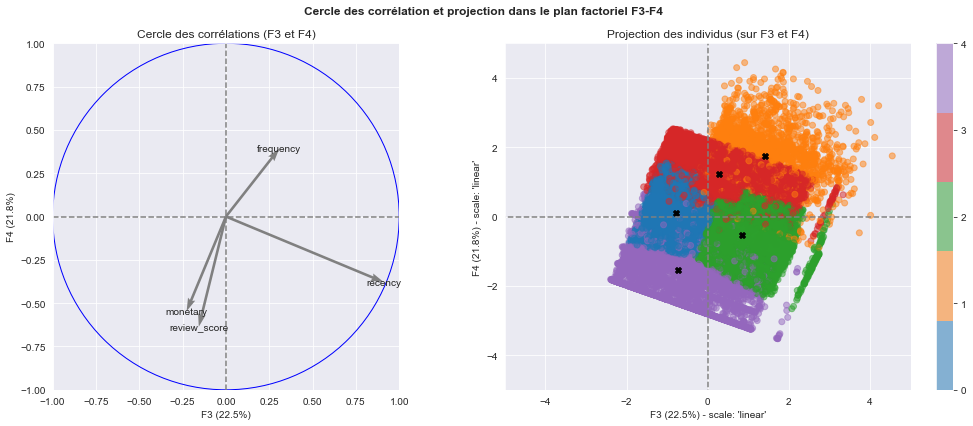

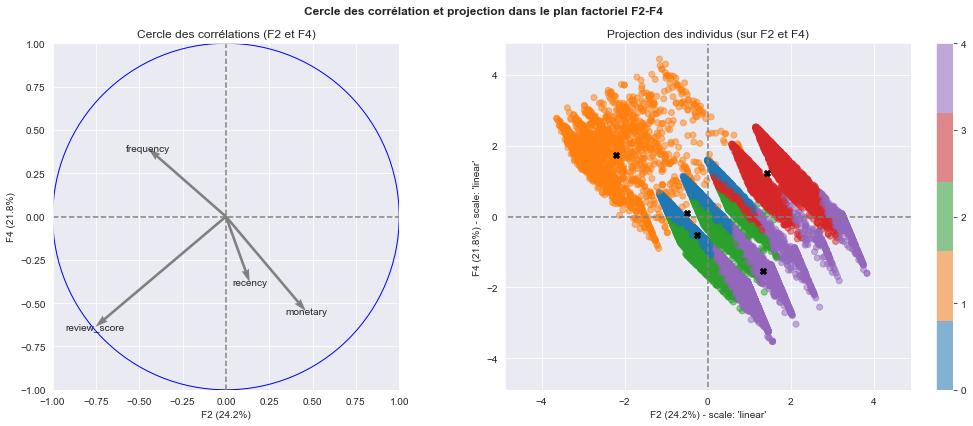

In [14]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM + review_score + paiement en plusieurs fois - Affichage des clusters\n"
      + Style.RESET_ALL)

# Affichage dans le plan de plus forte inertie
n_comp = 4
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X2)
pcs = pca.components_
X2_projected = pca.transform(X2)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
print(Fore.GREEN + "► Clusters pour n_clusters=5 :" + Style.RESET_ALL)
n_clusters = 5
model = KMeans(n_clusters=5)
model.fit(X2)
predict2 = model.predict(X2)
color = model.predict(X2)
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters])[0]
cnames = np.array(range(n_clusters))
centroids = pca.transform(model.cluster_centers_)
fct.projetNcircle_plot(pcs, X2_projected, n_comp, pca, [1, 2], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X2_projected, n_comp, pca, [3, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X2_projected, n_comp, pca, [2, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

K-Means sur RFM + review_score + paiement en une ou plusieurs fois - Affichage des clusters



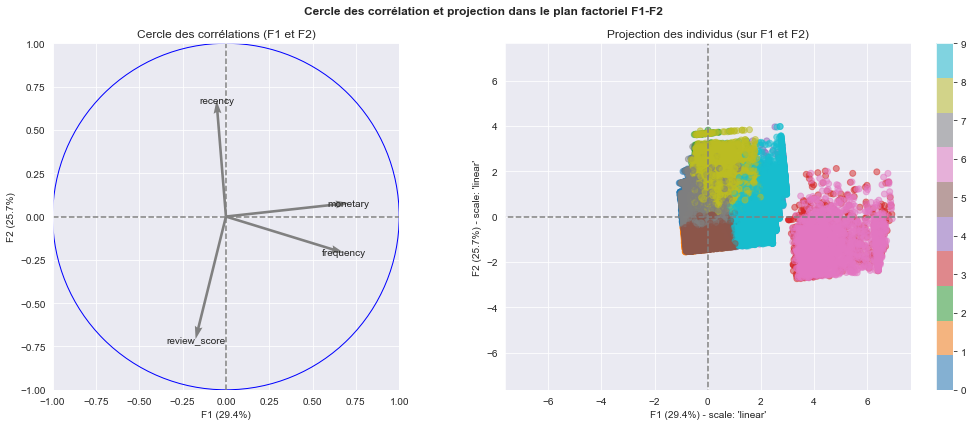

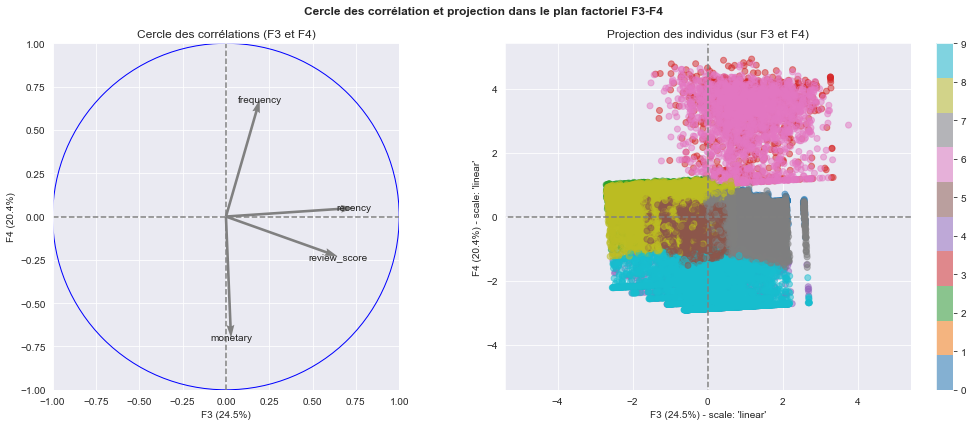

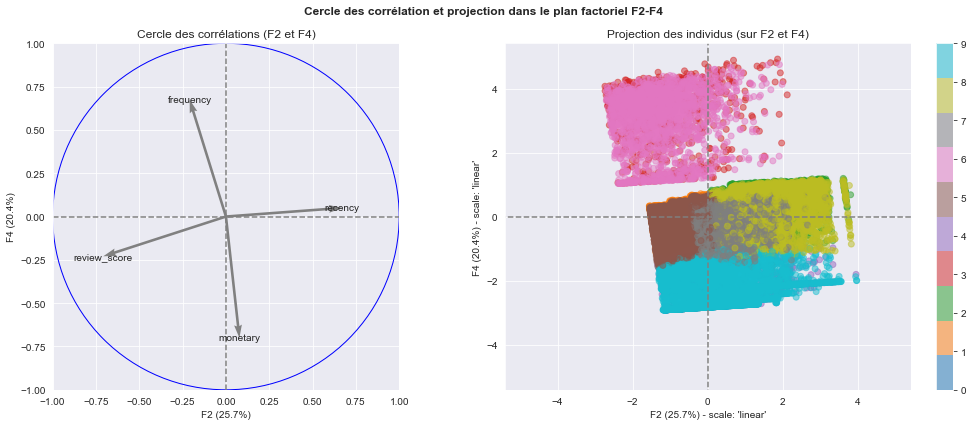

In [15]:
# Réunion des 10 clusters
X = np.concatenate((X1, X2), axis=0)
predict2 = predict2 + 5
predict = np.concatenate((predict1, predict2))

print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "K-Means sur RFM + review_score + paiement en une ou plusieurs fois - Affichage des clusters\n"
      + Style.RESET_ALL)

# Affichage dans le plan de plus forte inertie
n_comp = 4
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1

color = predict
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:10])[0]
cnames = np.array(range(10))

fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=None,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [3, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=None,
                           c_labels=pca_labels, c_lims=c_lims)
fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [2, 4], scale=scale, alpha=0.5,
                           color=color, cnames=cnames, cmap=cmap, centroids=None,
                           c_labels=pca_labels, c_lims=c_lims)

► Affichage des clusters avec t-SNE :


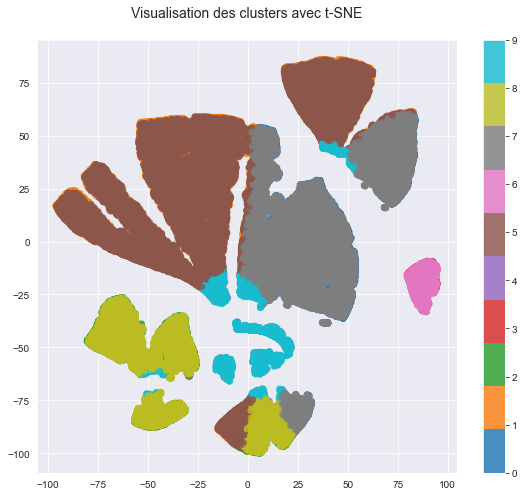

In [16]:
from sklearn.manifold import TSNE
n_components = 2
X_embedded = TSNE(n_components=n_components, perplexity=300.0, learning_rate='auto', init='random').fit_transform(X)

print(Fore.GREEN + "► Affichage des clusters avec t-SNE :" + Style.RESET_ALL)

fig= plt.figure(figsize=(8, 7))
plt.title(f"Visualisation des clusters avec t-SNE\n ", fontsize=14)
sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=color, cmap=cmap, alpha=0.8)
cbar = fig.colorbar(sc, ax=plt.gca())
cbar.set_ticks(np.unique(color))
cbar.set_ticklabels(cnames)
plt.tight_layout()
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dbscan"></a>
## 5 - Test d'algorithme par densité : DBSCAN


Au-delà du découpage de la population en 2 clusters fonction de la fréquence d'achat (une seule commande ou plus de 2 commandes), le clustering avec DBSCAN ne donne pas de bons résultats.
Il semble que la cause provienne de la différence de densité de population en fonction de la fréquence des commandes, qui transforme en bruit le cluster correspondant à plus d'une commande lorsqu'on recherche davantage de cluster.
Compte tenu du gap de récence autour de 600 jours, l'algorithme propose néanmoins de diviser le cluster correspondant à une seule commande en 2 groupes selon ce seuil de récence. Ce découpage n'a cependant pas de sens métier puisque ce gap sera soit comblé dans le temps, soit il mettra en exergue un segment commercialement inintéressant (nombre de jours de récence trop élevé correspondant à des anciens clients).


<a id="dbscan2"></a>
### 5.1 - Découpage en 2 clusters

In [17]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Clustering avec DBSCAN sur RFM\n" + Style.RESET_ALL)

# Features RFM
features = ['recency', 'frequency', 'monetary']
X = data[features].values

start_time = timeit.default_timer()
model = DBSCAN(eps = 0.6, min_samples=5, metric = 'euclidean', n_jobs = -1).fit(X)
#model = DBSCAN().fit(X)
elapsed = timeit.default_timer() - start_time
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

print(Fore.GREEN + "► Temps de calcul :" + Style.RESET_ALL, f"{fct.elapsed_format(elapsed)}", '\n')
print(Fore.GREEN + "► Nombre de clusters :" + Style.RESET_ALL, n_clusters, '\n')
print(Fore.GREEN + "► Volume de population considérée comme bruit :" + Style.RESET_ALL, list(model.labels_).count(-1), '\n')
print(Fore.GREEN + "► Indice de Calinski-Harabasz :" + Style.RESET_ALL, metrics.calinski_harabasz_score(X, model.labels_), '\n')
print(Fore.GREEN + "► Indice de davies_bouldin :" + Style.RESET_ALL, metrics.davies_bouldin_score(X, model.labels_), '\n')
print(Fore.GREEN + "► Paramètres du modèle :" + Style.RESET_ALL, model.get_params(), '\n')

Clustering avec DBSCAN sur RFM

► Temps de calcul : 32.018s 

► Nombre de clusters : 2 

► Volume de population considérée comme bruit : 3 

► Indice de Calinski-Harabasz : 24417.644756304195 

► Indice de davies_bouldin : 0.6592704866943689 

► Paramètres du modèle : {'algorithm': 'auto', 'eps': 0.6, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': -1, 'p': None} 



► Projection des clusters sur les plans factoriels :


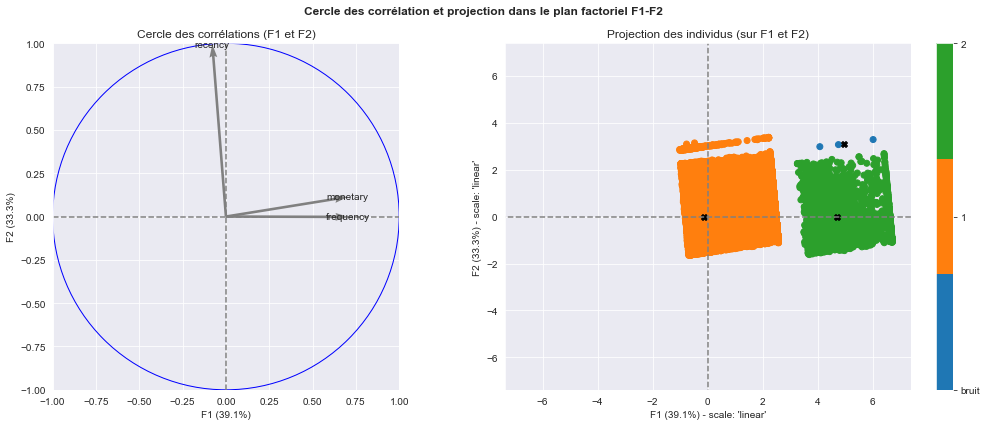

In [18]:
# Projection des clusters sur les plans factoriels
print(Fore.GREEN + "► Projection des clusters sur les plans factoriels :" + Style.RESET_ALL)

# Détermination des axes d'inertie et plans factoriels
n_comp = 3
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)

scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
color = model.labels_
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters+1])[0]
cnames = (['bruit'] if -1 in model.labels_ else [])
cnames.extend(np.array(range(1, n_clusters+1)) if -1 in model.labels_ else np.array(range( n_clusters)))
centroids = pca.transform(fct.get_centroids(data, features, model.labels_))

fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale,
                       color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                       c_labels=pca_labels, c_lims=c_lims)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dbscan3"></a>
### 5.2 - Découpage en 3 clusters
Ce découpage s'obtient notamment avec eps=0.5 et n_samples=2

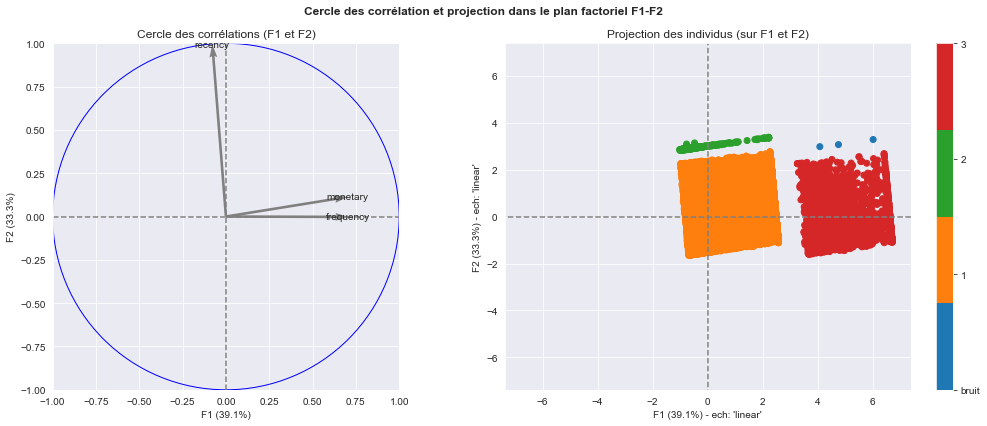

In [19]:
display_png(Image(".\P5_fig\dbs 5-2.png"))

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dbscan_eps"></a>
### 5.3 - Effet de diminution d'epsilon
La diminution d'epsilon augmente la population de bruit dans le sens de droite à gauche, c'est-à-dire pour les fréquences et montants de commande à la baisse.

Exemples successifs avec :
- eps=0.2 et n_samples=40 ;
- eps=0.1 et n_samples=40

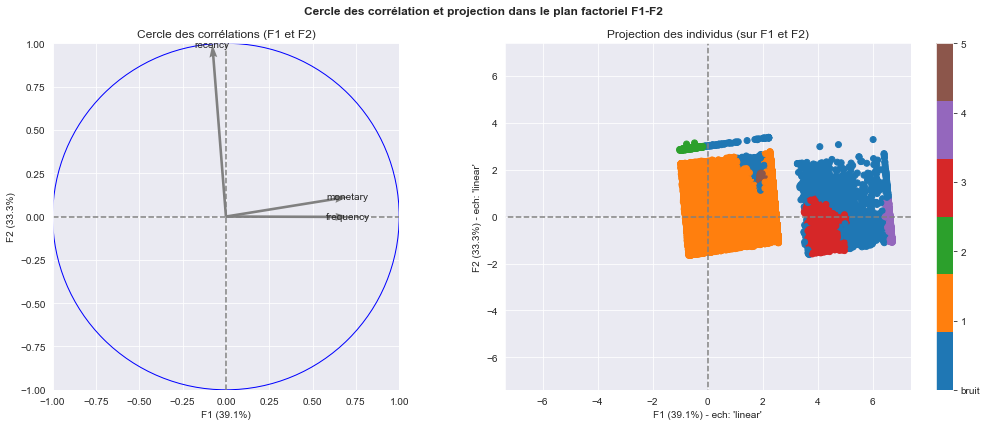

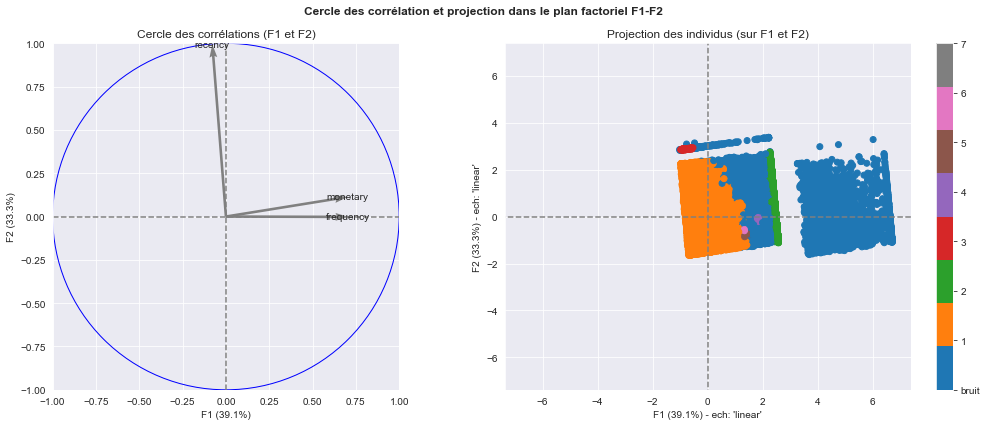

In [20]:
display_png(Image(".\P5_fig\dbs 2-40.png"))
display_png(Image(".\P5_fig\dbs 1-40.png"))

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dbscan_ns"></a>
### 5.4 - Effet d'augmentation de n_samples
L'augmentation de n_samples a un effet similaire à celui de la diminution d'epsilon.

Exemples successifs avec :
- eps=0.6 et n_samples=200 ;
- eps=0.6 et n_samples=1000

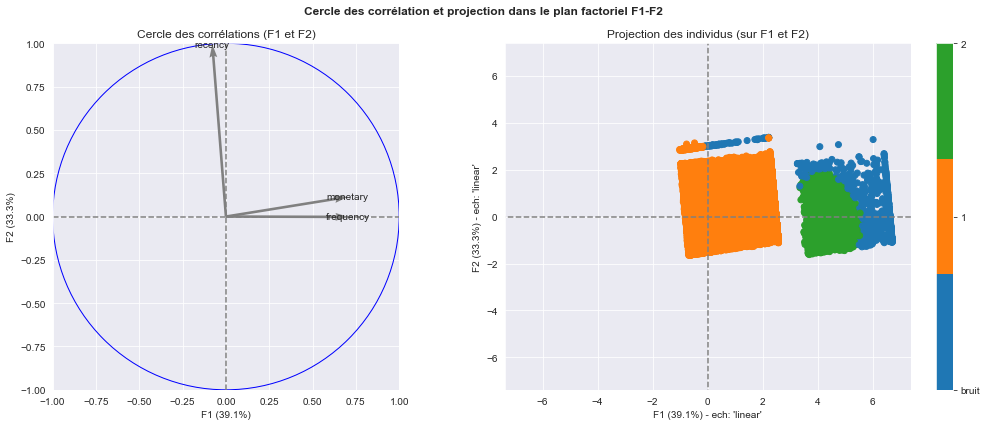

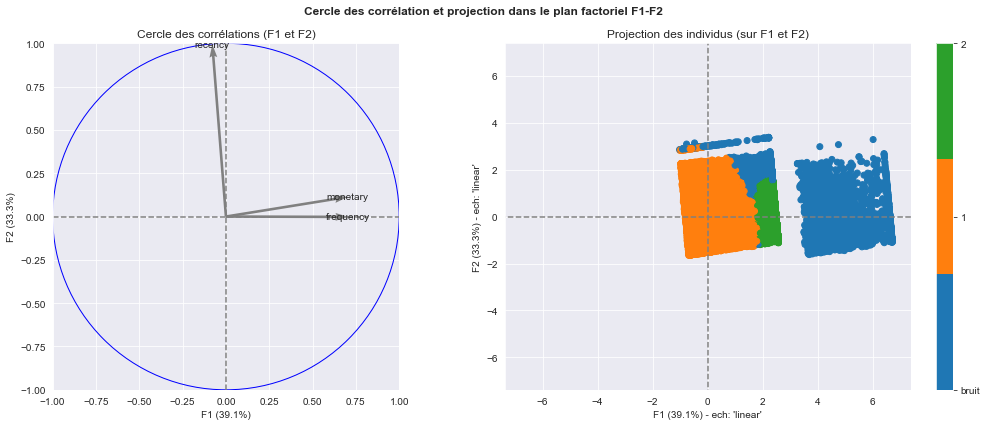

In [21]:
display_png(Image(".\P5_fig\dbs 6-200.png"))
display_png(Image(".\P5_fig\dbs 6-1000.png"))

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="alg_ha"></a>
## 6 - Test d'algorithmes hiérarchiques agglomératifs
Dans ce chapitre, nous testons les algorithmes de scikit-learn et scipy: ils donnent des résultats identiques avec cependant une performance de temps de calcul sensiblement plus élevée pour scipy (3h36 contre 5h04 pour effectuer le calcul complet des distances).

Le résultat de ce type d'algorithme est proche de celui de k-Means avec cependant des différences, notamment pour un nombre de clusters égal à 4. En effet, le clustering hiérarchique donne, pour les clients n'ayant effectué qu'une seule commande, un clustering découpé essentiellement en fonction du montant. Au-delà de 4 clusters, le clustering est similaire entre les 2 algorithmes.

<a id="alg_ha_skAC"></a>
### 6.1 - AgglomerativeClustering de Scikit-learn

In [22]:
# Features RFM
features = ['recency', 'frequency', 'monetary']
X = data[features].values

# Détermination des axes d'inertie et plans factoriels
n_comp = 3
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)

In [23]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "sklearn.cluster.AgglomerativeClustering sur RFM\n"
      + Style.RESET_ALL)

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Entrainement du modèle
filename = data_dir + "\\" + 'linkage_matrix_skAG.npy'
file_exists, Z = fct.load_matrix(filename)
if not file_exists:
    # Entrainement du modèle
    start_time = timeit.default_timer()
    model = AgglomerativeClustering(n_clusters=4, compute_distances=True).fit(X)
    elapsed = timeit.default_timer() - start_time
    # Affichage des résultats
    print(Fore.GREEN + "► Temps de calcul :" + Style.RESET_ALL, f"{fct.elapsed_format(elapsed)}", '\n')
    print(Fore.GREEN + "► Nombre de clusters :" + Style.RESET_ALL, model.n_clusters_, '\n')
    print(Fore.GREEN + "► Nombre de feuilles :" + Style.RESET_ALL, model.n_leaves_, '\n')
    print(Fore.GREEN + "► Population connectée :" + Style.RESET_ALL, model.n_connected_components_, '\n')
    print(Fore.GREEN + "► Indice de Calinski-Harabasz :" + Style.RESET_ALL, f"{metrics.calinski_harabasz_score(X, model.labels_):.1f}", '\n')
    print(Fore.GREEN + "► Indice de davies_bouldin :" + Style.RESET_ALL, f"{metrics.davies_bouldin_score(X, model.labels_):.3f}", '\n')
    # Calcul et sauvegarde de la matrice de linkage
    Z = fct.linkage_slAC(model)
    np.save(filename, Z)
else:
    print(Fore.GREEN + "► Récupération de la matrice de connection" + Style.RESET_ALL)

sklearn.cluster.AgglomerativeClustering sur RFM

► Récupération de la matrice de connection


► Dendrogramme juqu'au niveau 4 :


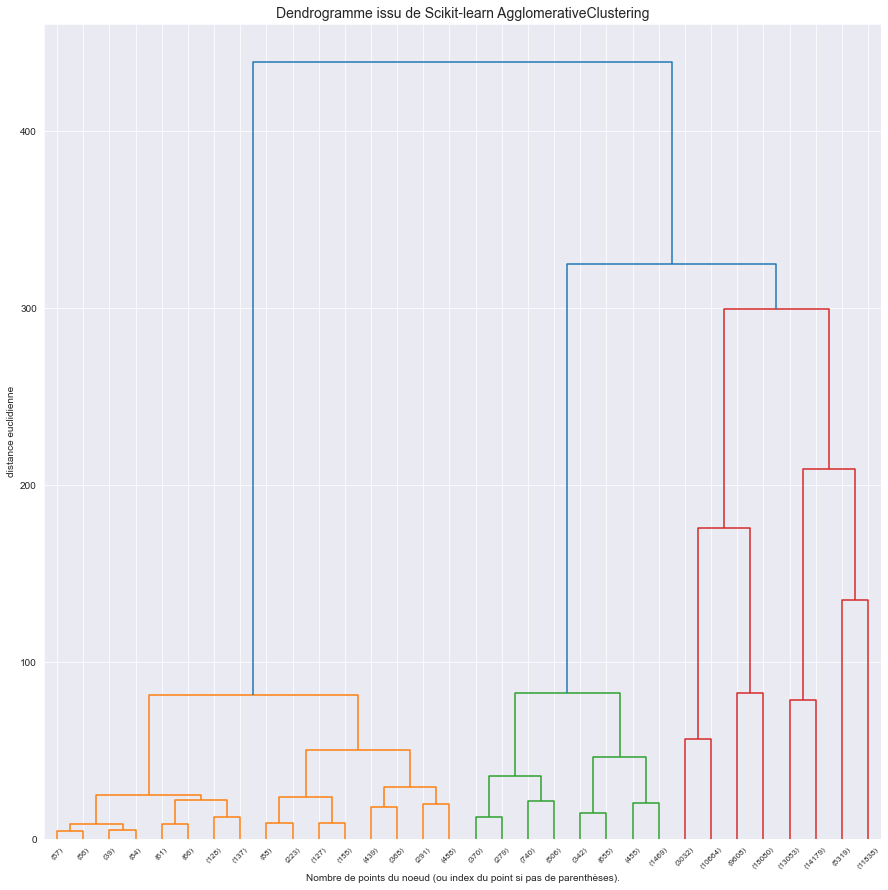

In [24]:
# Dendrogramme
from scipy.cluster.hierarchy import dendrogram
p = 4
print(Fore.GREEN + f"► Dendrogramme juqu'au niveau {p} :" + Style.RESET_ALL)
plt.figure(figsize=(15, 15))
plt.title("Dendrogramme issu de Scikit-learn AgglomerativeClustering", fontsize=14)
plt.ylabel('distance euclidienne')
dendrogram(Z, truncate_mode="level", p=p)
plt.xlabel("Nombre de points du noeud (ou index du point si pas de parenthèses).")
plt.tight_layout()
plt.show()

► Clustering pour 4 clusters :
  → Silhouette : 0.372
  → Calinski_harabasz : 69754.9
  → Davies_bouldin : 0.790


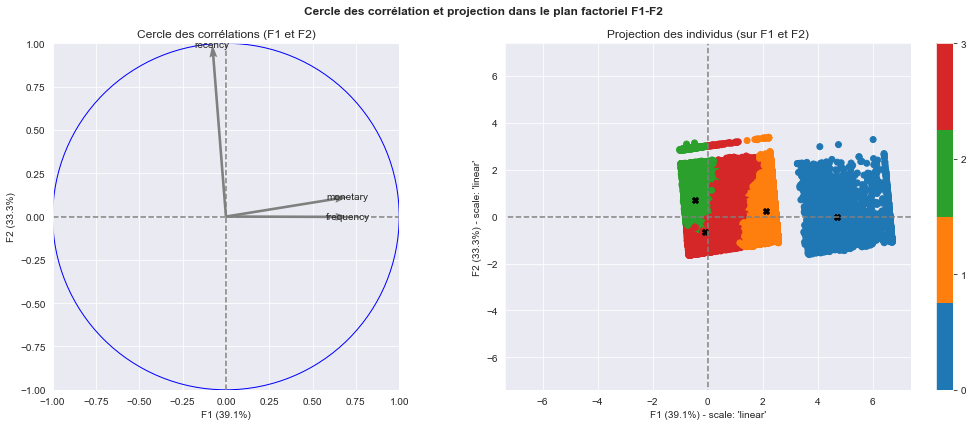

► Clustering pour 6 clusters :
  → Silhouette : 0.364
  → Calinski_harabasz : 87686.5
  → Davies_bouldin : 0.847


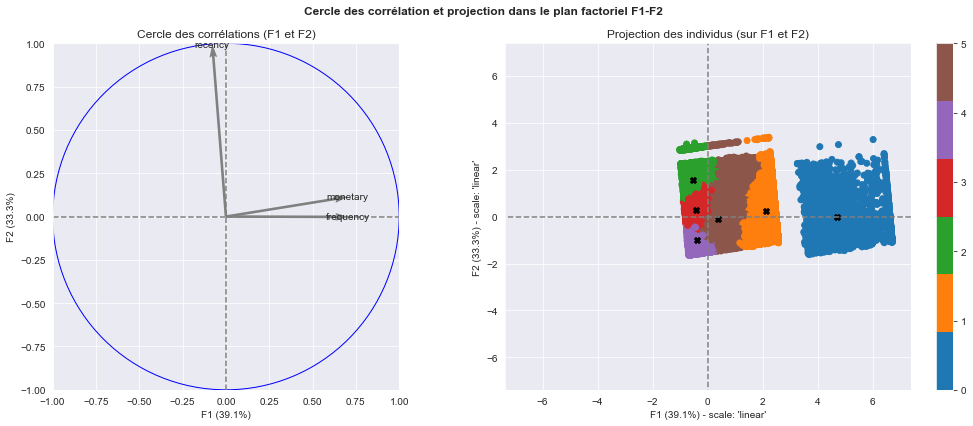

► Clustering pour 7 clusters :
  → Silhouette : 0.376
  → Calinski_harabasz : 93174.6
  → Davies_bouldin : 0.785


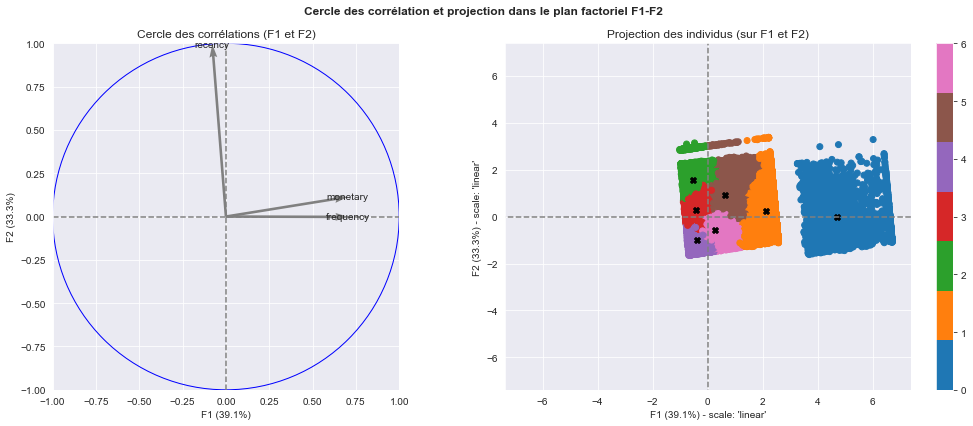

In [25]:
from scipy.cluster.hierarchy import fcluster
for n_clusters in [4, 6, 7]:
    print(Fore.GREEN + f"► Clustering pour {n_clusters} clusters :" + Style.RESET_ALL)
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    centroids = pca.transform(fct.get_centroids(data, features, clusters))

    # Evaluation du modèle
    print(f"  → Silhouette : {metrics.silhouette_score(X, clusters):.3f}")
    print(f"  → Calinski_harabasz : {metrics.calinski_harabasz_score(X, clusters):.1f}")
    print(f"  → Davies_bouldin : {metrics.davies_bouldin_score(X, clusters):.3f}")

    # Projection des clusters sur les plans factoriels
    color = clusters
    color = (color - color.min()) / (color.max() - color.min())
    cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters])[0]
    cnames = np.array(range(n_clusters))

    fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="alg_ha_scipy"></a>
### 6.2 - Clustering hiérarchique de Scipy

In [26]:
# Features RFM
features = ['recency', 'frequency', 'monetary']
X = data[features].values

# Détermination des axes d'inertie et plans factoriels
n_comp = 3
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)

In [27]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "Clustering hiérarchique avec Scipy sur RFM\n"
      + Style.RESET_ALL)

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Linkage
filename = data_dir + "\\" + 'linkage_matrix_scipy.npy'
file_exists, Z = fct.load_matrix(filename)
if not file_exists:
    start_time = timeit.default_timer()
    Z = linkage(X, method='ward', metric='euclidean')
    elapsed = timeit.default_timer() - start_time
    print(Fore.GREEN + "► Temps de calcul de la matrice de linkage:"
          + Style.RESET_ALL, f"{fct.elapsed_format(elapsed)}", '\n')
    np.save(filename, Z)
else:
    print(Fore.GREEN + "► Récupération de la matrice de connection" + Style.RESET_ALL)

Clustering hiérarchique avec Scipy sur RFM

► Récupération de la matrice de connection


► Dendrogramme juqu'au niveau 5 :


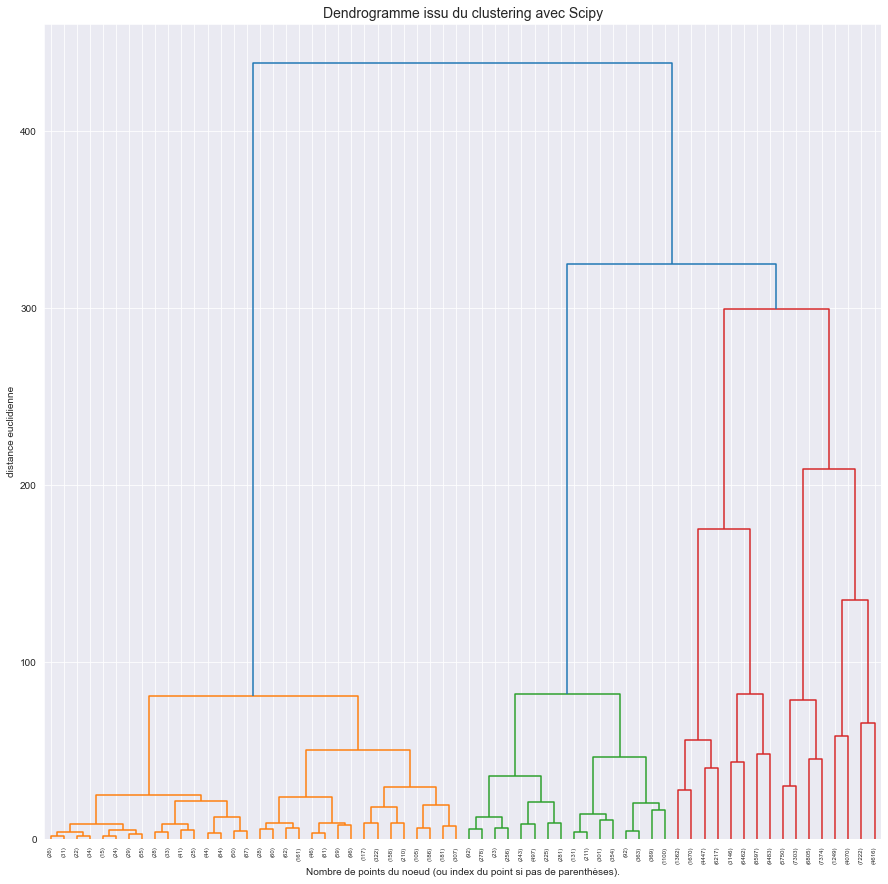

In [28]:
# Dendrogramme
from scipy.cluster.hierarchy import dendrogram
p = 5
print(Fore.GREEN + f"► Dendrogramme juqu'au niveau {p} :" + Style.RESET_ALL)
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 15))
plt.title("Dendrogramme issu du clustering avec Scipy", fontsize=14)
plt.ylabel('distance euclidienne')
dendrogram(Z, truncate_mode="level", p=p)
plt.xlabel("Nombre de points du noeud (ou index du point si pas de parenthèses).")
plt.tight_layout
plt.show()

► Clustering pour 4 clusters :
  → Silhouette : 0.372
  → Calinski_harabasz : 69754.9
  → Davies_bouldin : 0.790


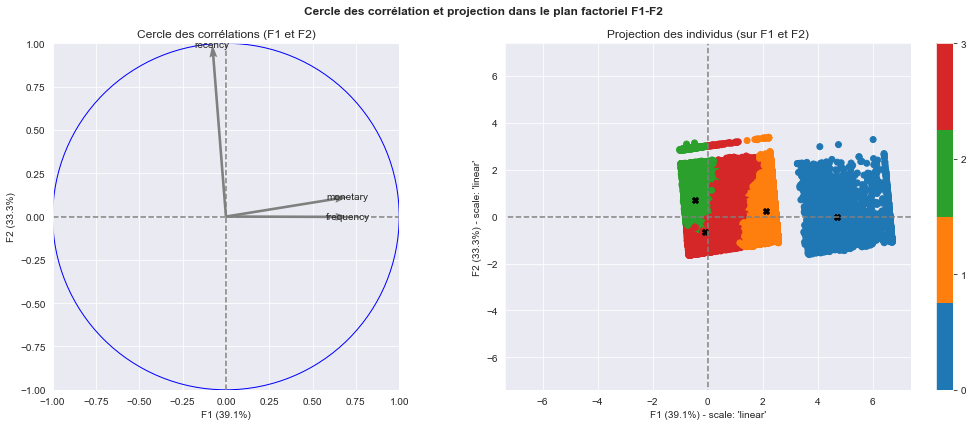

► Clustering pour 6 clusters :
  → Silhouette : 0.364
  → Calinski_harabasz : 87686.5
  → Davies_bouldin : 0.847


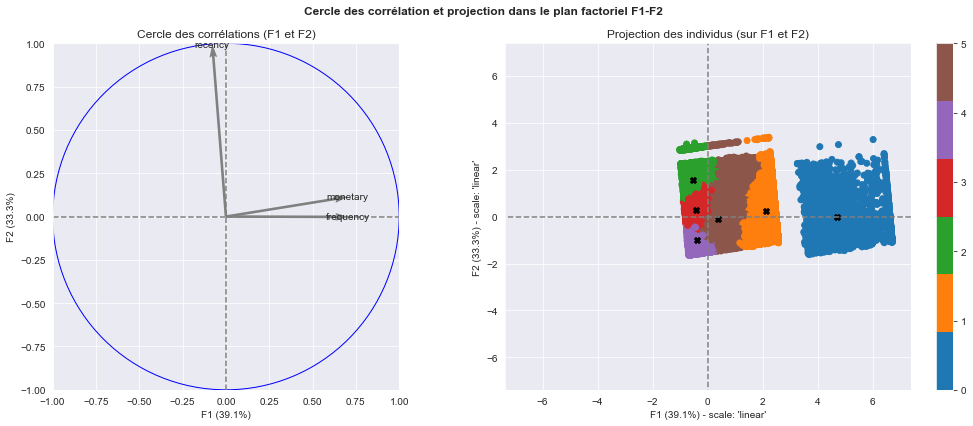

► Clustering pour 7 clusters :
  → Silhouette : 0.376
  → Calinski_harabasz : 93174.6
  → Davies_bouldin : 0.785


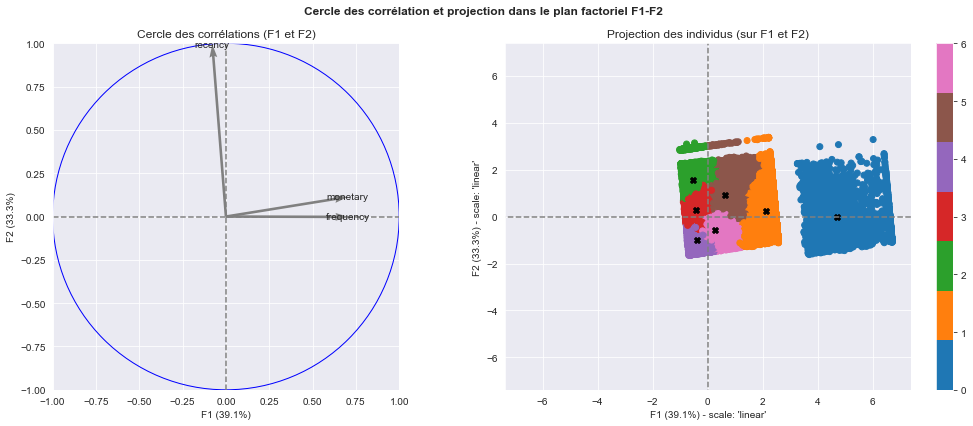

In [29]:
from scipy.cluster.hierarchy import fcluster
for n_clusters in [4, 6, 7]:
    print(Fore.GREEN + f"► Clustering pour {n_clusters} clusters :" + Style.RESET_ALL)
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    centroids = pca.transform(fct.get_centroids(data, features, clusters))

    # Evaluation du modèle
    print(f"  → Silhouette : {metrics.silhouette_score(X, clusters):.3f}")
    print(f"  → Calinski_harabasz : {metrics.calinski_harabasz_score(X, clusters):.1f}")
    print(f"  → Davies_bouldin : {metrics.davies_bouldin_score(X, clusters):.3f}")

    # Projection des clusters sur les plans factoriels
    color = clusters
    color = (color - color.min()) / (color.max() - color.min())
    cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters])[0]
    cnames = np.array(range(n_clusters))

    fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale,
                           color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                           c_labels=pca_labels, c_lims=c_lims)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="gmm"></a>
## 7 - Test du modèle de mélange gaussien - GMM

In [30]:
# Features RFM
features = ['recency', 'frequency', 'monetary']
X = data[features].values

# Détermination des axes d'inertie et plans factoriels
n_comp = 3
pca_labels = np.array(features)
pca = PCA(n_components=n_comp)
pca.fit(X)
pcs = pca.components_
X_projected = pca.transform(X)

In [31]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + "Modèle de mélange gaussien (GMM) sur RFM\n"
      + Style.RESET_ALL)

from sklearn.mixture import GaussianMixture

# Établissement du modèle
n_clusters = 4
start_time = timeit.default_timer()
model = GaussianMixture(n_components=n_clusters, random_state=0)
model.fit(X)
labels = model.predict(X)
means = model.means_
elapsed = timeit.default_timer() - start_time

# Evaluation du modèle
print(Fore.GREEN + "► Temps de calcul :" + Style.RESET_ALL, f"{fct.elapsed_format(elapsed)}", '\n')
print(Fore.GREEN + "► Nombre de clusters :" + Style.RESET_ALL, f"{n_clusters}", '\n')
print(Fore.GREEN + "► Calinski-Harabasz :" + Style.RESET_ALL,
      f"{metrics.calinski_harabasz_score(X, labels):.1f}", '\n')
print(Fore.GREEN + "► Davies_bouldin :" + Style.RESET_ALL,
      f"{metrics.davies_bouldin_score(X, labels):.3f}", '\n')
print(Fore.GREEN + "► Silhouette :" + Style.RESET_ALL,
      f"{metrics.silhouette_score(X, labels):.3f}", '\n')

Modèle de mélange gaussien (GMM) sur RFM

► Temps de calcul : 577ms 

► Nombre de clusters : 4 

► Calinski-Harabasz : 87903.5 

► Davies_bouldin : 0.767 

► Silhouette : 0.444 



► Projection des clusters sur les plans factoriels :


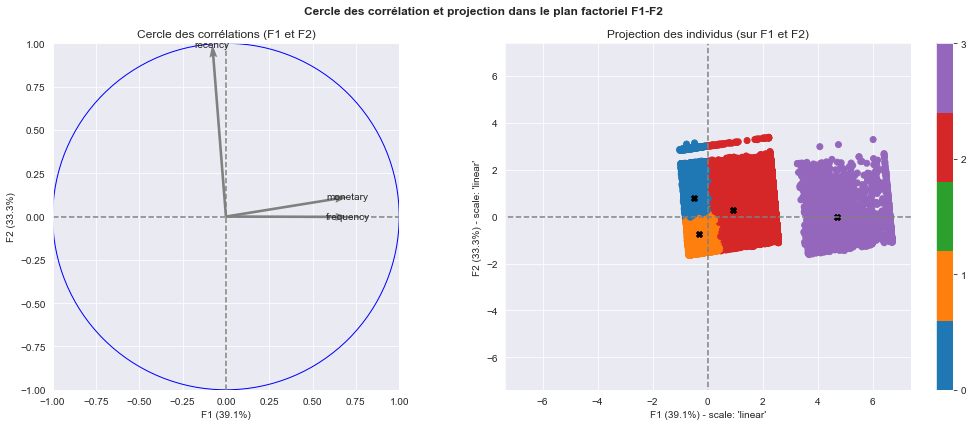

In [32]:
# Projection des clusters sur les plans factoriels
print(Fore.GREEN + "► Projection des clusters sur les plans factoriels :" + Style.RESET_ALL)
scale = 'linear', 'linear'
c_lims = -1, 1, -1, 1
color = labels
color = (color - color.min()) / (color.max() - color.min())
cmap = fct.discrete_colormap(fct.discrete_palette[:n_clusters+1])[0]
cnames = np.array(range( n_clusters))
centroids = pca.transform(means)

fct.projetNcircle_plot(pcs, X_projected, n_comp, pca, [1, 2], scale=scale,
                       color=color, cnames=cnames, cmap=cmap, centroids=centroids,
                       c_labels=pca_labels, c_lims=c_lims)

► Affichage des clusters avec t-SNE :


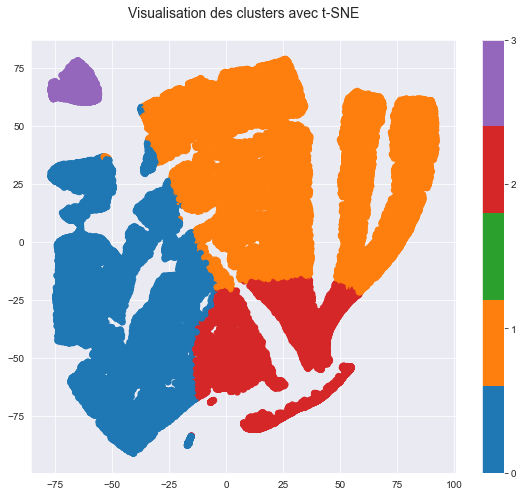

In [33]:
from sklearn.manifold import TSNE
n_components = 2
X_embedded = TSNE(n_components=n_components, perplexity=300.0, learning_rate='auto', init='random').fit_transform(X)

print(Fore.GREEN + "► Affichage des clusters avec t-SNE :" + Style.RESET_ALL)

fig= plt.figure(figsize=(8, 7))
plt.title(f"Visualisation des clusters avec t-SNE\n ", fontsize=14)
sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=color, cmap=cmap)
cbar = fig.colorbar(sc, ax=plt.gca())
cbar.set_ticks(np.unique(color))
cbar.set_ticklabels(cnames)
plt.tight_layout()
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="conclusion"></a>
## 8 - Conclusion
Dans ce notebook, nous avons testé 4 algorithmes de clustering parmi les plus connus : k-Means, DBSCAN, AgglomerativeClustering et GMM.
Mis à part DBSCAN qui n'est pas apparu adapté à notre problématique, les 3 autres algorithmes ont dessiné des clusters conduisant à des principes de segmentation similaires, avec cependant des nuances dans les découpages.
Sur la base du clustering k-Means avec 4 clusters sur les variables RFM, nous avons traduit le résultat sous la forme d'une segmentation métier.
Avec cette étude, nous disposons de la matière permettant un échange avec le marketing de l'entreprise afin de le mettre en position de décider des orientations métiers qu'il souhaite prendre.

[<font color='red'><em>retour sommaire</em></font>](#sommaire)